# 常用的分类算法

In [101]:
import numpy as np 
import os
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 回归
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor


# 分类
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier





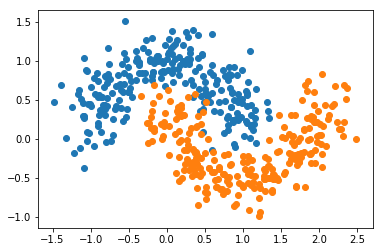

In [27]:
X, y = datasets.make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)


In [58]:
FILE_PATH = './data'
FILE_NAME = 'log_clf.txt'

if(os.path.exists(os.path.join(FILE_PATH, FILE_NAME))):
    os.remove(os.path.join(FILE_PATH, FILE_NAME))

def write_log(message):
    if not os.path.exists(FILE_PATH):
        os.mkdirs(FILE_PATH)
    file = os.path.join(FILE_PATH, FILE_NAME)
    
    with open(file, 'a+') as f:
        f.write(message)
        f.write('\n')

        
def write_result(key, cv_result):
    write_log( '%8s:  Mean: %.3f\tMin: %.3f\t(std:  %.3f)'%(key, cv_result.mean(), cv_result.min(), cv_result.std()) )

In [106]:
num_folds = 10
seed = 42
scoring = 'accuracy'

models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
models['SGD'] = SGDClassifier()
models['MLP'] = MLPClassifier(solver='lbfgs', alpha=1e-5,
                              hidden_layer_sizes=(5, 2), random_state=seed)


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3

      LR:  Mean: 0.859	Min: 0.737	(std:  0.061)
f1: 0.852	recall: 0.897	 precision: 0.812 

     LDA:  Mean: 0.859	Min: 0.757	(std:  0.055)
f1: 0.852	recall: 0.897	 precision: 0.812 

     KNN:  Mean: 0.973	Min: 0.919	(std:  0.024)
f1: 0.984	recall: 1.000	 precision: 0.969 

    CART:  Mean: 0.957	Min: 0.838	(std:  0.044)
f1: 0.968	recall: 1.000	 precision: 0.938 

      NB:  Mean: 0.856	Min: 0.757	(std:  0.052)
f1: 0.852	recall: 0.897	 precision: 0.812 

     SVM:  Mean: 0.952	Min: 0.892	(std:  0.036)
f1: 0.959	recall: 1.000	 precision: 0.922 

     SGD:  Mean: 0.822	Min: 0.711	(std:  0.055)
f1: 0.815	recall: 1.000	 precision: 0.688 

     MLP:  Mean: 0.962	Min: 0.892	(std:  0.035)
f1: 0.984	recall: 1.000	 precision: 0.969 



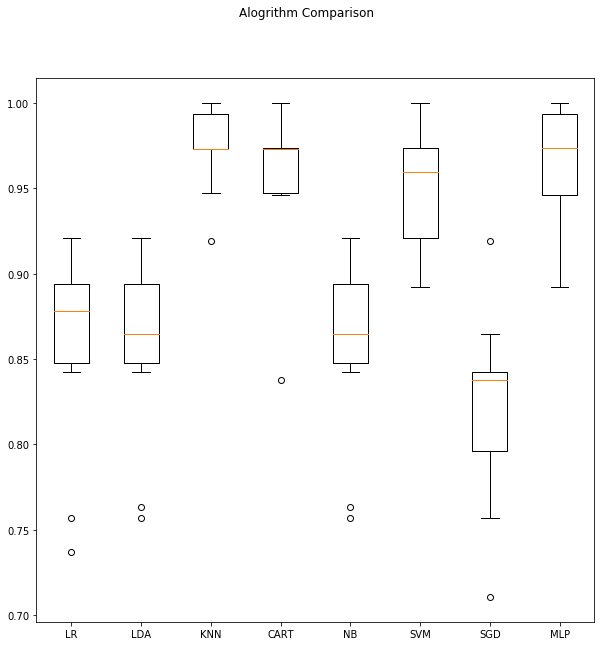

In [107]:
results = []
write_log("---------- models ---------------")
for key in models: 
    kfold = KFold(n_splits=num_folds, random_state=seed)
    
    clf = models[key].fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    
    cv_result = cross_val_score(models[key], 
                               X_train, 
                               y_train,
                               cv=kfold,
                               scoring=scoring)
    results.append(cv_result)
    print( '%8s:  Mean: %.3f\tMin: %.3f\t(std:  %.3f)'%(key, cv_result.mean(), cv_result.min(), cv_result.std()) )
    write_result(key, cv_result)
    print('f1: %.3f\trecall: %.3f\t precision: %.3f \n' %(f1 , recall, precision ) )
    write_log('f1: %.3f\trecall: %.3f\t precision: %.3f \n' %(f1 , recall, precision ) )

fig = plt.figure(figsize=(10,10))
fig.suptitle('Alogrithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())

plt.show()

In [75]:
pipelines= {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])
pipelines['ScalerLD'] = Pipeline([('Scaler', StandardScaler()), ('LD', LinearDiscriminantAnalysis())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])
pipelines['ScalerNB'] = Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])


 

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3

ScalerLR:  Mean: 0.861	Min: 0.737	(std:  0.063)
f1: 0.852	recall: 0.897	 precision: 0.812 

ScalerLD:  Mean: 0.859	Min: 0.757	(std:  0.055)
f1: 0.852	recall: 0.897	 precision: 0.812 

ScalerKNN:  Mean: 0.973	Min: 0.921	(std:  0.024)
f1: 0.968	recall: 1.000	 precision: 0.938 

ScalerCART:  Mean: 0.957	Min: 0.838	(std:  0.044)
f1: 0.968	recall: 1.000	 precision: 0.938 

ScalerNB:  Mean: 0.856	Min: 0.757	(std:  0.052)
f1: 0.852	recall: 0.897	 precision: 0.812 

ScalerSVM:  Mean: 0.965	Min: 0.892	(std:  0.034)
f1: 0.968	recall: 1.000	 precision: 0.938 



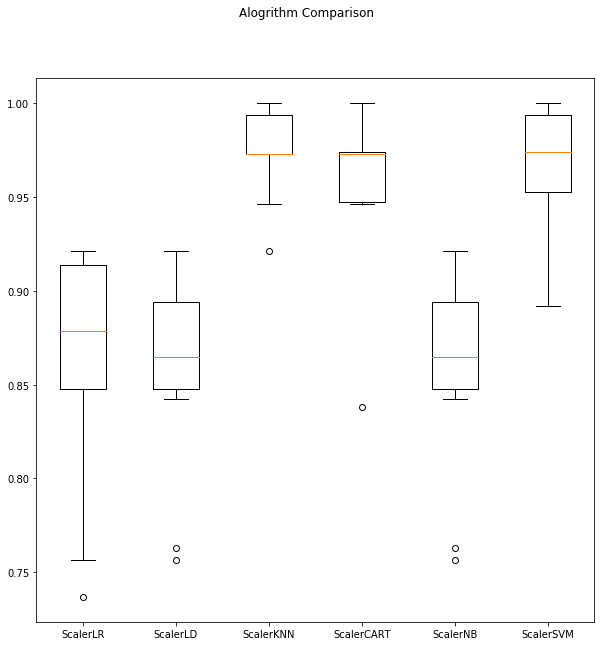

In [96]:
results = []
write_log("---------- pipelines ---------------")
for key in pipelines: 
    kfold = KFold(n_splits=num_folds, random_state=seed)
    
    clf = pipelines[key].fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    
    cv_result = cross_val_score(pipelines[key], 
                               X_train, 
                               y_train,
                               cv=kfold,
                               scoring=scoring)
    results.append(cv_result)
    print( '%8s:  Mean: %.3f\tMin: %.3f\t(std:  %.3f)'%(key, cv_result.mean(), cv_result.min(), cv_result.std()) )
    write_result(key, cv_result)
    print('f1: %.3f\trecall: %.3f\t precision: %.3f \n' %(f1 , recall, precision ) )
    write_log('f1: %.3f\trecall: %.3f\t precision: %.3f \n' %(f1 , recall, precision ) )

fig = plt.figure(figsize=(10,10))
fig.suptitle('Alogrithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(pipelines.keys())

plt.show()

In [93]:
ensembles= {}
ensembles['ScalerAB'] = Pipeline([('Scaler', StandardScaler()), ('LR', AdaBoostClassifier(n_estimators=100))])
# ensembles['ScalerAB-KNN'] = Pipeline([('Scaler', StandardScaler()), ('ABKNN', AdaBoostClassifier(base_estimator=KNeighborsRegressor()))])
# ensembles['ScalerAB-LR'] = Pipeline([('Scaler', StandardScaler()), ('ABLR', AdaBoostClassifier(base_estimator=LinearRegression()))])
ensembles['ScalerRFR'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestClassifier())])
ensembles['ScalerETR'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesClassifier())])
ensembles['ScalerGBR'] = Pipeline([('Scaler', StandardScaler()), ('GBR', GradientBoostingClassifier(n_estimators=100))])


ScalerAB:  Mean: 0.955	Min: 0.892	(std:  0.027)
f1: 0.976	recall: 1.000	 precision: 0.953 

ScalerRFR:  Mean: 0.971	Min: 0.946	(std:  0.019)
f1: 0.976	recall: 1.000	 precision: 0.953 

ScalerETR:  Mean: 0.973	Min: 0.921	(std:  0.024)
f1: 0.968	recall: 1.000	 precision: 0.938 

ScalerGBR:  Mean: 0.968	Min: 0.919	(std:  0.023)
f1: 0.976	recall: 1.000	 precision: 0.953 



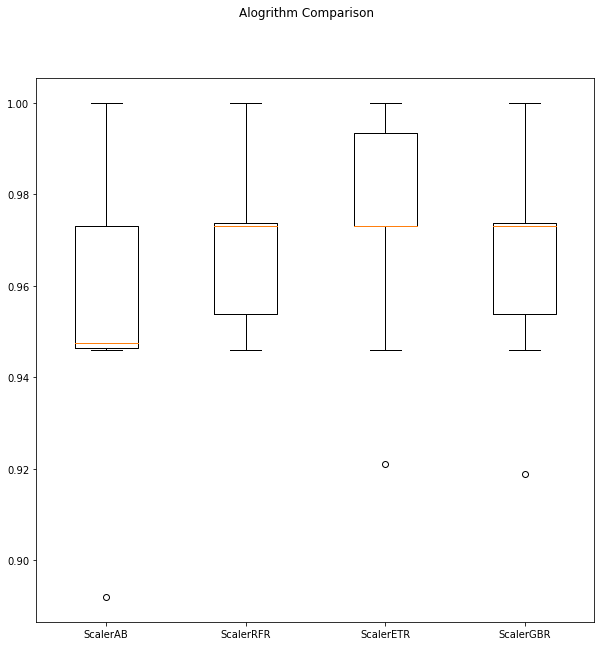

In [95]:
results = []
write_log("---------- ensembles ---------------")
for key in ensembles: 
    kfold = KFold(n_splits=num_folds, random_state=seed)
    
    clf = ensembles[key].fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    
    cv_result = cross_val_score(ensembles[key], 
                               X_train, 
                               y_train,
                               cv=kfold,
                               scoring=scoring)
    results.append(cv_result)
    print( '%8s:  Mean: %.3f\tMin: %.3f\t(std:  %.3f)'%(key, cv_result.mean(), cv_result.min(), cv_result.std()) )
    write_result(key, cv_result)
    print('f1: %.3f\trecall: %.3f\t precision: %.3f \n' %(f1 , recall, precision ) )
    write_log('f1: %.3f\trecall: %.3f\t precision: %.3f \n' %(f1 , recall, precision ) )

fig = plt.figure(figsize=(10,10))
fig.suptitle('Alogrithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())

plt.show()